### Phase Unwrapping
[link to example](https://scikit-image.org/docs/stable/auto_examples/filters/plot_phase_unwrap.html#sphx-glr-auto-examples-filters-plot-phase-unwrap-py)

Some signals can only be observed modulo 2*pi, and this can also apply to two- and three dimensional images. In these cases phase unwrapping is needed to recover the underlying, unwrapped signal. In this example we will demonstrate an algorithim implemented in `skimage` at work for such problem. One-, two- and three dimensional images can all be unwrapped using skimage. Here we will demonstrate phase unwrapping in the two dimensional case.

Text(0.5, 1.0, 'Unwrapped minus original')

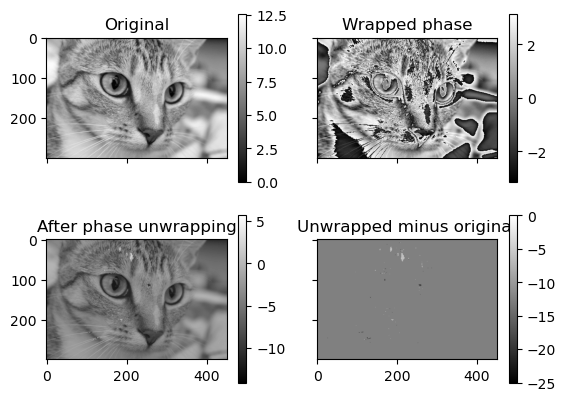

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, img_as_float, color, exposure
from skimage.restoration import unwrap_phase

# Load an image as a floating-point grayscale
image = color.rgb2gray(img_as_float(data.chelsea()))
# Scale the image to [0, 4*pi]
image = exposure.rescale_intensity(image, out_range=(0, 4 * np.pi))
# Create a phase-wrapped image in the interval [-pi, pi)
image_wrapped = np.angle(np.exp(1j * image))
# Perform phase unwrapping
image_unwrapped = unwrap_phase(image_wrapped)

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
ax = axs.ravel()

fig.colorbar(ax[0].imshow(image, cmap='gray'), ax=ax[0])
ax[0].set_title("Original")

fig.colorbar(ax[1].imshow(image_wrapped, cmap='gray', vmin=-np.pi, vmax=np.pi), ax=ax[1])
ax[1].set_title("Wrapped phase")

fig.colorbar(ax[2].imshow(image_unwrapped, cmap='gray'), ax=ax[2])
ax[2].set_title("After phase unwrapping")

fig.colorbar(ax[3].imshow(image_unwrapped - image, cmap='gray'), ax=ax[3])
ax[3].set_title("Unwrapped minus original")

The unwrapping procedure accepts masked arrays, and can also optionally assume cyclic boundaries to connect edges of an image. In the example below, we study a simple phase ramp which has been split in two by masking a row of the image.

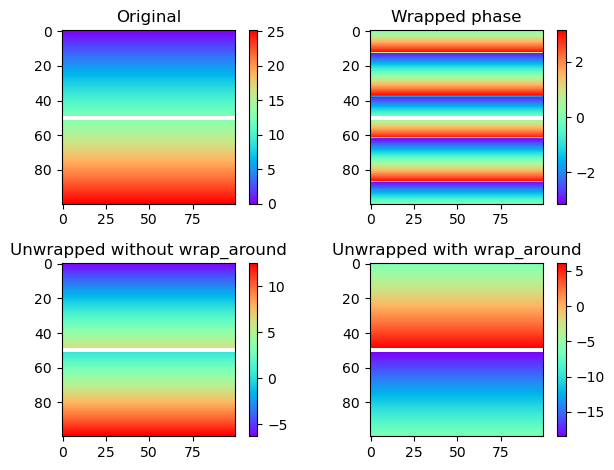

In [8]:
# Create a simple ramp
image = np.ones((100, 100)) * np.linspace(0, 8 * np.pi, 100).reshape((-1, 1))
# Mask the image to split in two horizontally
mask = np.zeros_like(image, dtype=bool)
mask[image.shape[0] // 2, :] = True

image_wrapped = np.ma.array(np.angle(np.exp(1j * image)), mask=mask)
# Unwrap image without wrap around
image_unwrapped_no_wrap_around = unwrap_phase(image_wrapped, wrap_around=(False, False))
# Unwrap with wrap around enabled for the 0th dimension
image_unwrapped_wrap_around = unwrap_phase(image_wrapped, wrap_around=(True, False))

fig, axs = plt.subplots(2, 2)
ax = axs.ravel()

fig.colorbar(ax[0].imshow(np.ma.array(image, mask=mask),  cmap='rainbow'), ax=ax[0])
ax[0].set_title("Original")

fig.colorbar(ax[1].imshow(image_wrapped, cmap='rainbow', vmin=-np.pi, vmax=np.pi), ax=ax[1])
ax[1].set_title("Wrapped phase")

fig.colorbar(ax[2].imshow(image_unwrapped_no_wrap_around, cmap='rainbow'), ax=ax[2])
ax[2].set_title("Unwrapped without wrap_around")

fig.colorbar(ax[3].imshow(image_unwrapped_wrap_around, cmap='rainbow'), ax=ax[3])
ax[3].set_title("Unwrapped with wrap_around")

plt.tight_layout()
plt.show()

In the figures above, the masked row can be seen as a white line across the image. The difference between the two unwrapped images in the bottom row is clear:
- Without unwrapping (lower left), the regions above and below the masked boundary do not interact at all, resulting in an offset between the two regions as two separate images. 
- With wrap around enabled for the vertical direction (lower right), the situation changes: Unwrapping paths are now allowed to pass from the bottom to the top of the iage and vices versa, in effect providing a way to determine the offset between the two regions.